## 安装库
本例使用pycharm

- 安装notebook

```python
pip install notebook
```

- 安装tensorflow

本例使用了**tf-nightly**

```python
pip install tf-nightly
```

In [1]:
#导入keras
import tensorflow.keras as keras

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
#导入tensorflow
import tensorflow as tf
print(tf.__version__)

1.12.0-dev20180926


## 下载mnist数据
keras默认从(https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz)下载，但国内很难连上，
可以参考(http://www.cnblogs.com/shinny/p/9283372.html)。手动下载mnist.npz，然后修改mnist.py中的引用路径。
如果找不到mnist.py，可以用everthing搜索。

mnist.npz已上传到datasets文件夹，可从[这里]()下载。

In [3]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

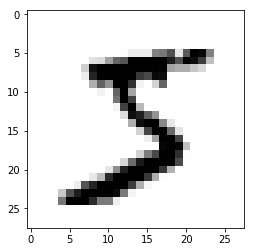

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

In [5]:
print(y_train[0])

5


[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

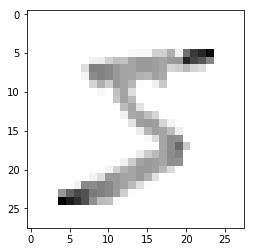

In [6]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

print(x_train[0])

plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

In [7]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
60000/60000 [==============================] - 15s 254us/step - loss: 0.2563 - acc: 0.9248
Epoch 2/3
60000/60000 [==============================] - 6s 107us/step - loss: 0.1081 - acc: 0.9665
Epoch 3/3
60000/60000 [==============================] - 7s 109us/step - loss: 0.0737 - acc: 0.9777


In [8]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss)
print(val_acc)

10000/10000 [==============================] - 0s 46us/step
0.09269746929686516
0.9708


In [9]:
predictions = model.predict(x_test)
print(predictions)

[[8.8540384e-09 1.2010514e-08 8.4797415e-07 ... 9.9985945e-01
  4.4095773e-07 6.2582812e-06]
 [9.7641809e-08 8.4762014e-03 9.9100375e-01 ... 8.4532692e-09
  1.1629361e-05 9.1832054e-12]
 [1.9781417e-09 9.9992287e-01 1.9637739e-05 ... 2.6759613e-05
  2.1188511e-05 3.5105760e-08]
 ...
 [8.3089546e-10 7.8291782e-07 2.2996884e-08 ... 3.0950861e-04
  3.1089010e-06 1.6785970e-04]
 [3.2990449e-08 2.2628739e-05 9.8154613e-09 ... 2.6752227e-06
  1.8036989e-03 5.3969260e-09]
 [1.1823743e-06 7.2185024e-08 2.2751304e-07 ... 1.0656525e-10
  3.2980407e-07 6.6678885e-09]]


In [10]:
import numpy as np

print(np.argmax(predictions[0]))

7


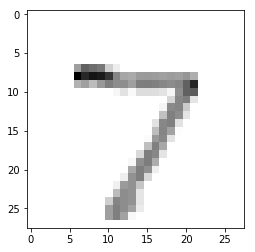

In [11]:
plt.imshow(x_test[0],cmap=plt.cm.binary)
plt.show()

In [12]:
# 保存模型
model.save('epic_num_reader.model')

In [13]:
# 加载保存的模型
new_model = tf.keras.models.load_model('epic_num_reader.model')

In [14]:
# 测试保存的模型
predictions = new_model.predict(x_test)
print(np.argmax(predictions[0]))

7
